In [1]:
#zdroj https://machinelearningmastery.com/neural-networks-are-function-approximators/
# info k normalizaci dat https://www.infor.uva.es/~isaac/doctorado/ai-nn.faq/FAQ2.html#A_std_in

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
from random import random
import numpy as np
# define the dataset
pocet_hodnot_x = 201
x = np.linspace(0, 2*np.pi,pocet_hodnot_x) #vytvoreni vektoru x-ovych hodnot
y = np.sin(x) + 0.2*(2*np.random.rand(pocet_hodnot_x) - 1) # zasumeni signalu 
#print(len(y))

print('orig. rozsahy promennych x,y', x.min(), x.max(), y.min(), y.max())
# reshape arrays into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))


In [ ]:


# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x) #prevod hodnot x na interval <0,1> dle vzorce   x_s = (x - x_min)/(x_max-x_min)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y) #preskalovani y ovych hodnot na interval <0,1> dle vzorce y_s = (y - y_min)/(y_max-y_min)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0) #rozdeleni dat na trenovaci [x_train, y_train] a testovaci [x_test, y_test], test_size udava relativni zastoupeni testovacich dat v ramci vsech dat

print('rozsahy promennych x,y po preskalovani', x.min(), x.max(), y.min(), y.max())
# definice neuronove site
model = Sequential()
model.add(Dense(10, input_dim=1, activation='sigmoid', kernel_initializer='he_uniform')) #inicializatory vah a biasu https://keras.io/api/layers/initializers/   activation='relu'
model.add(Dense(10, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(Dense(1)) #pokud neni definovana aktivacni funkce je defaultne pouzita jako aktivace identita, tj. vystupem danych neuronu je pouze potencial neuronu, tedy u kazdeho neuronu skalarni soucin jeho vah a vstupu + bias
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam') #definice chybove funkce neuronove site a optimalizacni metody






rozsahy promennych x,y po preskalovani 0.0 1.0 0.0 1.0


In [ ]:
# uceni neuronove site
history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=5000, batch_size=len(x_train), verbose=0) #verbose = 0/1  nechci/chci vypisovat chybu neuronove site behem uceni batch_size=10


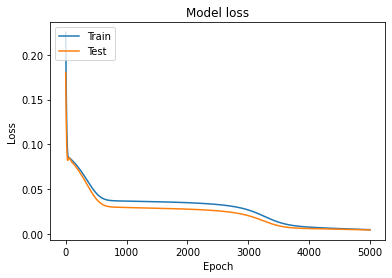

In [ ]:
#vykresleni vyvoje chyby site na treninkove a testovaci mnozine behem uceni
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# predikce dat pomoci naucene neuronove site

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)
# inverzni transformace dat , tedy z intervalu 0,1 zpet na interval x_min, x_max a y_min, y_max
x_train_plot = scale_x.inverse_transform(x_train) #skalovaci objekt scale_x ma ulozene minimum a maximum puvodnich dat v polozkach scale_x.data_min_  scale_x.data_max_  , proto muze realizovat i inverzni transformaci na ose x
y_train_plot = scale_y.inverse_transform(y_train) #skalovaci objekt scale_y ma ulozene minimum a maximum puvodnich dat v polozkach scale_y.data_min_  scale_y.data_max_  , proto muze realizovat i inverzni transformaci na ose y

x_test_plot = scale_x.inverse_transform(x_test) #skalovaci objekt scale_x ma ulozene minimum a maximum puvodnich dat v polozkach scale_x.data_min_  scale_x.data_max_  , proto muze realizovat i inverzni transformaci na ose x
y_test_plot = scale_y.inverse_transform(y_test) #skalovaci objekt scale_y ma ulozene minimum a maximum puvodnich dat v polozkach scale_y.data_min_  scale_y.data_max_  , proto muze realizovat i inverzni transformaci na ose y


ypred_train_plot = scale_y.inverse_transform(ypred_train)
ypred_test_plot = scale_y.inverse_transform(ypred_test)
# report model error
print('MSE: %.3f' % mean_squared_error(y_train_plot, ypred_train_plot)) #prumerny ctverec rozdilu hodnot y_plot(i)  a ypred_plot(i)


2/2 [==============================] - 0s 0s/step
MSE: 0.025


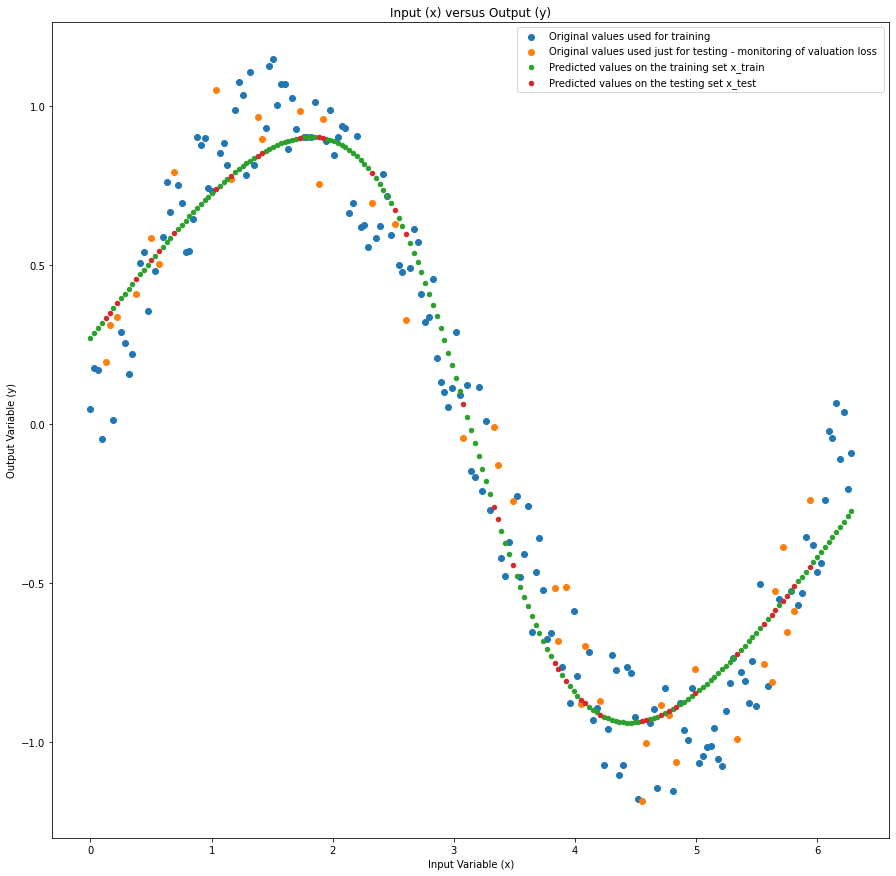

In [ ]:
# plot x vs y
fig = plt.figure (figsize=(15,15))
plt.scatter(x_train_plot,y_train_plot, label='Original values used for training')
plt.scatter(x_test_plot,y_test_plot, label='Original values used just for testing - monitoring of valuation loss ')
# plot x vs yhat
plt.scatter(x_train_plot,ypred_train_plot, label='Predicted values on the training set x_train', s=20)
plt.scatter(x_test_plot,ypred_test_plot, label='Predicted values on the testing set x_test', s=20)
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()